In [2]:
%matplotlib inline
import openmc
from IPython.display import Image
from dagmc_geometry_slice_plotter import plot_axis_slice
import math

In [3]:
#materials

skin=openmc.Material(name='skin')
skin.add_element('H',10.0)
skin.add_element('C',19.9)
skin.add_element('N',4.2)
skin.add_element('O',65.0)
skin.add_element('Na',0.2)
skin.add_element('P',0.1)
skin.add_element('S',0.2)
skin.add_element('Cl',0.3)
skin.add_element('K',0.1)

skin.set_density('g/cm3', 1.089)
skin.id=5

materials=openmc.Materials([skin])
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material id="5" name="skin">
    <density units="g/cm3" value="1.089" />
    <nuclide ao="9.9984426" name="H1" />
    <nuclide ao="0.0015574" name="H2" />
    <nuclide ao="19.679547799999998" name="C12" />
    <nuclide ao="0.22045219999999996" name="C13" />
    <nuclide ao="4.1846154" name="N14" />
    <nuclide ao="0.0153846" name="N15" />
    <nuclide ao="64.845339" name="O16" />
    <nuclide ao="0.024635" name="O17" />
    <nuclide ao="0.130026" name="O18" />
    <nuclide ao="0.2" name="Na23" />
    <nuclide ao="0.1" name="P31" />
    <nuclide ao="0.19008148000000002" name="S32" />
    <nuclide ao="0.0014973800000000002" name="S33" />
    <nuclide ao="0.00839198" name="S34" />
    <nuclide ao="2.916e-05" name="S36" />
    <nuclide ao="0.22729409999999997" name="Cl35" />
    <nuclide ao="0.0727059" name="Cl37" />
    <nuclide ao="0.09325810000000001" name="K39" />
    <nuclide ao="1.17e-05" name="K40" />
    <nuclide ao="0.0067302"

In [9]:
#geometry
dagmc_univ=openmc.DAGMCUniverse(filename='matskin2.h5m').bounded_universe()
geometry=openmc.Geometry(root=dagmc_univ)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell fill="3" id="10000" region="10000 -10001 10002 -10003 10004 -10005" universe="4" />
  <dagmc_universe filename="matskin2.h5m" id="3" />
  <surface boundary="vacuum" coeffs="-28.68559455871582" id="10000" type="x-plane" />
  <surface boundary="vacuum" coeffs="27.06486701965332" id="10001" type="x-plane" />
  <surface boundary="vacuum" coeffs="-13.592663764953613" id="10002" type="y-plane" />
  <surface boundary="vacuum" coeffs="15.51210880279541" id="10003" type="y-plane" />
  <surface boundary="vacuum" coeffs="-87.84912872314453" id="10004" type="z-plane" />
  <surface boundary="vacuum" coeffs="88.13441467285156" id="10005" type="z-plane" />
</geometry>


/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10000.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10001.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10002.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10003.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10004.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10005.
  warn(msg, IDWarning)
/hom

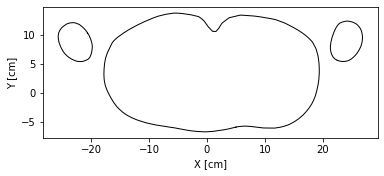

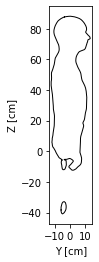

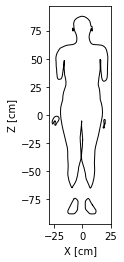

In [5]:
#plotting
plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='dagmc.h5m',
    view_direction='z',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='dagmc.h5m',
    view_direction='x',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='dagmc.h5m',
    view_direction='y',
)

plot.show()

In [5]:
#point source
point=openmc.stats.Point((0,0,80))
source=openmc.Source(space=point)

source.energy = openmc.stats.Discrete([1e6], [1])
source.particle = 'photon'

In [6]:
#settings
settings=openmc.Settings()
settings.source=source
settings.batches=100
settings.inactive=10
settings.particles=5000

settings.run_mode = "fixed source"

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>fixed source</run_mode>
  <particles>5000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source particle="photon" strength="1.0">
    <space type="point">
      <parameters>0 0 80</parameters>
    </space>
    <energy type="discrete">
      <parameters>1000000.0 1.0</parameters>
    </energy>
  </source>
</settings>


In [7]:
#tallies
energy_bins_p, dose_coeffs_p = openmc.data.dose_coefficients(particle='photon', geometry='AP')

energy_function_filter_p = openmc.EnergyFunctionFilter(energy_bins_p, dose_coeffs_p)
energy_function_filter_p.interpolation == 'cubic'

photon_particle_filter = openmc.ParticleFilter(["photon"])
surface_filter=openmc.SurfaceFilter(13) #check the surface ID in cubit

dose_tally = openmc.Tally(name="dose_tally_on_surface")
dose_tally.scores = ["current"]
dose_tally.filters = [
    surface_filter,
    photon_particle_filter,
    energy_function_filter_p,
]
my_tallies = openmc.Tallies([dose_tally])
my_tallies.export_to_xml()

In [10]:
#running the model
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [11]:
#post-processing
sp=openmc.StatePoint('statepoint.100.h5')

tally=sp.get_tally(name='dose_tally_on_surface')
df=tally.get_pandas_dataframe()

tally_result=df['mean'].sum()
tally_std_dev=df['std. dev.'].sum()

dose_in_pSv=tally_result/(18926.6)#get surface area from cubit

source_activity=5000
emission_rate=2 #from example, might not be correct
gamma_per_second=source_activity*emission_rate
dose_rate_in_pSv=dose_in_pSv*gamma_per_second

print('The surface dose = ', dose_rate_in_pSv, 'pSv per sec')

The surface dose =  1.8662359519196117 pSv per sec
